In [1]:
from pylab import *
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import myalgotrade
reload(myalgotrade)
from myalgotrade.broker import tradeutil
from myalgotrade import strategy
from myalgotrade import resultAnalyzer
from myalgotrade import strategy
from myalgotrade.strategy import dt_strategy

param = {
    'k': 5,
    'm': 3,
    'trailing_start': 60,
    'stop_loss_set': 20,
    'adjust': 0,
    'min_point': 1,
    'lots': 1
}
strategy_class = dt_strategy.DTStrategy
param_key = strategy_class.get_log_key(param)

In [3]:
from myalgotrade.strategy import sample
experiment_key = 'tutorial'
param = {
    'ma_short': 5,
    'ma_long': 40,
}
strategy_class = sample.SampleStrategy
param_key = strategy_class.get_log_key(param)

tutorial
['sr', 'l', 'p', 'm', 'rb']
all count 178
net profit -1295.6445
win ratio 0.297752808989
profit loss ratio 2.24182379354
max fund use 52046.312
max drawdown (5277.312, 0.10139646398000304)
longest drawdown duration 105 days, 0:00:00
annual return (-4222.412879464285, -0.0811279938425663, -0.07887071205606588)
return risk ratio -0.800106736055
sharp ratio -0.363325321768


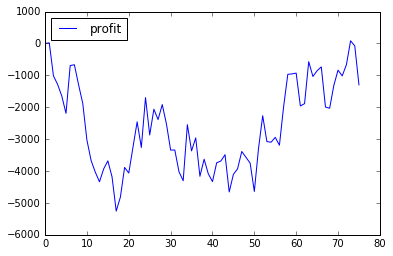

all count 178
net profit -1295.6445
win ratio 0.297752808989
profit loss ratio 2.24182379354
max fund use 52046.312
max drawdown (5277.312, 0.10139646398000304)
longest drawdown duration 105 days, 0:00:00
annual return (-4222.412879464285, -0.0811279938425663, -0.07887071205606588)
return risk ratio -0.800106736055
sharp ratio -0.363325321768


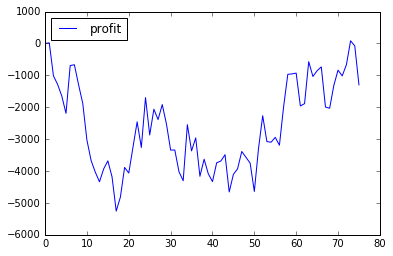

In [11]:
combine_set = ['sr', 'l', 'p', 'm', 'rb']
result = combine_result(experiment_key, combine_set)
show_result(result)
result.show_result()
result.plotEquityCurve()

In [4]:
_default_combine_set = [v.upper() for v in tradeutil.all_commodity_set]

def combine_result(experiment_key,combine_set = None):
    # combine_set = ['TA']#['I', 'PP', 'M', 'L', 'P', 'Y', 'C', 'J', 'CS', 'JM', 'JD']
    # combine_set = ['M', 'L', 'J', 'JM', 'JD', 'SR', 'RM', 'CF', 'RB', 'RU', 'AL']
    if combine_set is None or len(combine_set) == 0:
        combine_set = _default_combine_set
    results = {}
    for instrument in combine_set:
            log_key = strategy.log_path_delimiter.join((experiment_key, instrument, param_key, param_key))
            results[instrument] = strategy.StrategyRecord.construct_by_log_name(log_key)
    result = strategy.combine_result(results, strategy.log_path_delimiter.join((experiment_key, param_key))).analyze_result
    print experiment_key
    print combine_set
    return result

In [5]:
def show_result(result):
    print 'all count', result.getAllCount()
    print 'net profit', result.getNetProfit()
    print 'win ratio', result.getWinRatio()
    print 'profit loss ratio', result.getProfitLossRatio()
    print 'max fund use', result.getMaxFundUse()
    print 'max drawdown', result.getMaxDrawDown()
    print 'longest drawdown duration', result.getLongestDrawDownDuration()
    print 'annual return', result.getAnnualizedReturn()
    print 'return risk ratio', result.getReturnRiskRatio()
    print 'sharp ratio', result.getSharpeRatio()
    result.plotEquityCurve()

In [5]:
print tradeutil.all_commodity_set

['i', 'pp', 'm', 'l', 'p', 'y', 'c', 'j', 'cs', 'jm', 'jd', 'ma', 'sr', 'rm', 'ta', 'cf', 'fg', 'zc', 'rb', 'bu', 'ni', 'ru', 'ag', 'cu', 'zn', 'au', 'al']


In [6]:
def combine_optimizer_result(experiment_key, combine_set=None):
    if combine_set is None or len(combine_set) == 0:
        combine_set = _default_combine_set
    results = {}
    for instrument in combine_set:
        log_key = experiment_key + '-' + instrument + '_all-combined'
        results[instrument] = strategy.StrategyRecord.construct_by_log_name(log_key)
    result = strategy.combine_result(results, experiment_key + '_combine_temp').analyze_result
    print experiment_key
    print combine_set
    return result

example-sql-dt-12
['M', 'L', 'P', 'SR', 'RM', 'TA', 'RB', 'RU', 'AG', 'AU', 'AL', 'BU', 'CU', 'ZN']
all count 3611
net profit 16300366.3015
win ratio 0.338687344226
profit loss ratio 2.26737769535
max fund use 25224081.9135
max drawdown (3865697.9135000017, 0.15325425626020778)
longest drawdown duration 166 days, 0:00:00
annual return (4666379.372586261, 0.18499699567217154, 0.15338723293744372)
return risk ratio 1.20712468408
sharp ratio 1.17681839262


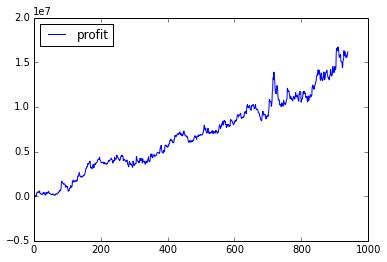

In [66]:
experiment_key = 'example-sql-dt-12'
del_set = ['AG', 'AU', 'AL', 'RB', 'RU', 'NI'] + ['BU', 'CU', 'ZN']
combine_set = ['M', 'L', 'P']#+ ['I', 'PP']# + ['Y', 'C', 'J', 'CS', 'JM', 'JD']
combine_set += ['SR', 'RM', 'TA']#+ ['CF', 'FG']
combine_set += ['RB', 'RU'] + ['AG', 'AU', 'AL'] + ['BU', 'CU', 'ZN']
# combine_set = ['RB' ,'AG', 'SR', 'M',  'AU']
result = combine_result(experiment_key, combine_set)
show_result(result)

test-optimizer-sql1
['M', 'L', 'P', 'SR', 'RM', 'TA', 'RB', 'AG', 'AU', 'CU']
all count 2847
net profit 7081177.047
win ratio 0.341060765718
profit loss ratio 2.30741308504
max fund use 9604637.011
max drawdown (1575009.011, 0.16398423065818868)
longest drawdown duration 301 days, 0:00:00
annual return (2027160.487964708, 0.211060603919028, 0.17129866559747997)
return risk ratio 1.28707866038
sharp ratio 1.54096423013


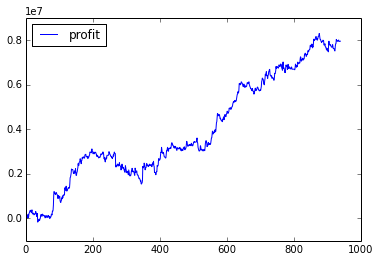

In [8]:
experiment_key = 'test-optimizer-sql1'
combine_set = ['I', 'PP', 'M', 'L', 'P', 'Y', 'C', 'J', 'CS', 'JM', 'JD']
combine_set += ['SR', 'RM', 'TA', 'CF', 'FG']
# combine_set += ['RB', 'RU','AG', 'BU', 'CU', 'ZN', 'AU', 'AL']
combine_set = ['M', 'L', 'P', 'SR', 'RM', 'TA', 'RB', 'AG', 'AU', 'CU']
result = combine_optimizer_result(experiment_key, combine_set)
show_result(result)

test-optimizer-sql5
['rb']
all count 260
net profit 107116.05
win ratio 0.342307692308
profit loss ratio 2.5054285011
max fund use 193059.29
max drawdown (19639.289999999994, 0.10172672861274894)
longest drawdown duration 261 days, 0:00:00
annual return (30664.594705882366, 0.15883511591637145, 0.13468243212217468)
return risk ratio 1.56139018803
sharp ratio 0.937965060359


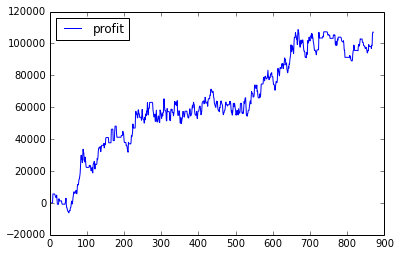

In [58]:
experiment_key = 'test-optimizer-sql5'
del_set = ['AG', 'AU', 'BU', 'CU', 'ZN', 'AL', 'RB', 'RU', 'NI']
combine_set = ['I', 'PP', 'M', 'L', 'P', 'Y', 'C', 'J', 'CS', 'JM', 'JD']
combine_set += ['SR', 'RM', 'TA', 'CF', 'FG']
combine_set += ['RB', 'RU', 'CU', 'ZN', 'AL']# + ['AG', 'AU', 'BU']

combine_set = ['rb']
# combine_set = ['i']

result = combine_optimizer_result(experiment_key, combine_set)
show_result(result)

In [59]:
from myalgotrade.feed import Frequency
from myalgotrade.util import dbutil
from datetime import datetime
import pprint
date_format = '%Y-%m-%d'
instrument = 'rb'
instrument = instrument.upper()
start_date = datetime(2009, 1, 1,)
end_date = datetime(2016, 1, 1)
feed_infos = dbutil.get_dominant_contract_infos(instrument, Frequency.MINUTE, start_date, end_date, 0)
for key in sorted(feed_infos.keys()):
    info = feed_infos[key]
    line = '\t'.join((instrument, key, info[1].strftime(date_format), info[2].strftime(date_format)))
    print line.strip()

RB	RB1005	2010-01-04	2010-03-10
RB	RB1010	2010-03-11	2010-07-19
RB	RB1101	2010-07-20	2010-10-15
RB	RB1105	2010-10-18	2011-02-10
RB	RB1110	2011-02-11	2011-08-08
RB	RB1201	2011-08-09	2011-11-04
RB	RB1205	2011-11-07	2012-03-05
RB	RB1210	2012-03-06	2012-07-12
RB	RB1301	2012-07-13	2012-10-24
RB	RB1305	2012-10-25	2013-02-19
RB	RB1310	2013-02-20	2013-07-04
RB	RB1401	2013-07-05	2013-11-01
RB	RB1405	2013-11-04	2014-03-05
RB	RB1410	2014-03-06	2014-07-07
RB	RB1501	2014-07-08	2014-10-21
RB	RB1505	2014-10-22	2015-03-10
RB	RB1510	2015-03-11	2015-07-21
RB	RB1601	2015-07-22	2015-07-31


combine_set = ['I', 'PP', 'M', 'L', 'P', 'Y', 'C', 'J', 'CS', 'JM', 'JD']
combine_set += ['SR', 'RM', 'TA', 'CF', 'FG']
combine_set += ['RB', 'RU','AG', 'BU', 'CU', 'ZN', 'AU', 'AL']




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [10]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df.T.columns

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [44]:
df.stack().unstack(0)

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.235630,2.580569,1.473729,-0.397794,-0.465198,1.172942
B,0.373439,-0.293661,0.676829,0.722473,1.445719,2.103922
C,1.889895,0.225801,-0.482683,-0.101697,-0.106636,-0.865265
D,-0.389109,0.935746,-0.434774,-0.126520,-0.234522,-0.116637
